In [32]:
from tensorflow.keras.layers import LSTM, Input, SimpleRNN, GRU, Dense,Flatten,GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# short distance data
T=10
D=1
X=[]
Y=[]
def get_label(x,i1,i2,i3):
  if x[i1]<0 and x[i2]<0 and x[i3]<0:
    return 1
  if x[i1]<0 and x[i2]>0 and x[i3]>0:
    return 1
  if x[i1]>0 and x[i2]<0 and x[i3]>0:
    return 1
  if x[i1]>0 and x[i2]>0 and x[i3]<0:
    return 1  
  return 0

for t in range(5000):
  x=np.random.randn(T)
  X.append(x)
  #  short dstance
  y=get_label(x,-1,-2,-3)
  Y.append(y)
X=np.array(X)
Y=np.array(Y)
N=len(X)


In [4]:
# using linear r
i=Input(shape=(T,))
x=Dense(1,activation='sigmoid')(i)
model=Model(i,x)
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])

r=model.fit(
    X,Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 3s 7ms/step - loss: 0.7865 - accuracy: 0.5004 - val_loss: 0.7061 - val_accuracy: 0.5008
Epoch 2/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.4920 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5084
Epoch 4/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6948 - accuracy: 0.4872 - val_loss: 0.6946 - val_accuracy: 0.5008
Epoch 5/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.5044 - val_loss: 0.6942 - val_accuracy: 0.5040
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.4996 - val_loss: 0.6945 - val_accuracy: 0.4972
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5064 - val_loss: 0.6951 - val_accuracy: 0.4904
Epoch 8/100
7

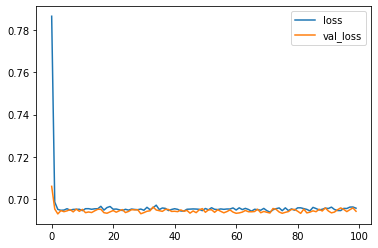

In [5]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

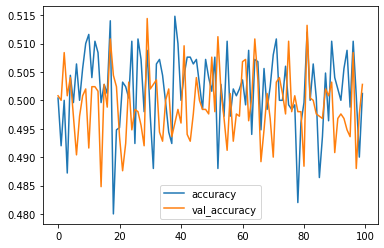

In [6]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [7]:
# simplernn
input=np.expand_dims(X,-1)
i=Input(shape=(T,D))

x=SimpleRNN(5)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
r=model.fit(
    input,Y,
    epochs=200,
    validation_split=0.5,
)



Epoch 1/200
79/79 [==============================] - 2s 13ms/step - loss: 0.7017 - accuracy: 0.5220 - val_loss: 0.6918 - val_accuracy: 0.5804
Epoch 2/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6924 - accuracy: 0.5028 - val_loss: 0.6871 - val_accuracy: 0.5472
Epoch 3/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6814 - accuracy: 0.5844 - val_loss: 0.6656 - val_accuracy: 0.6568
Epoch 4/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6331 - accuracy: 0.7004 - val_loss: 0.5927 - val_accuracy: 0.7664
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.5480 - accuracy: 0.7752 - val_loss: 0.4844 - val_accuracy: 0.8244
Epoch 6/200
79/79 [==============================] - 1s 11ms/step - loss: 0.4190 - accuracy: 0.8432 - val_loss: 0.3583 - val_accuracy: 0.8840
Epoch 7/200
79/79 [==============================] - 1s 12ms/step - loss: 0.3125 - accuracy: 0.8988 - val_loss: 0.2786 - val_accuracy: 0.9132
Epoch 

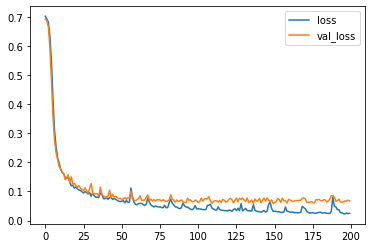

In [8]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

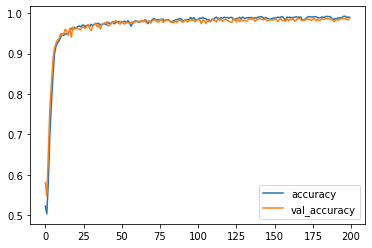

In [9]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [10]:
# long distance data
T=10
D=1
X=[]
Y=[]
def get_label(x,i1,i2,i3):
  if x[i1]<0 and x[i2]<0 and x[i3]<0:
    return 1
  if x[i1]<0 and x[i2]>0 and x[i3]>0:
    return 1
  if x[i1]>0 and x[i2]<0 and x[i3]>0:
    return 1
  if x[i1]>0 and x[i2]>0 and x[i3]<0:
    return 1  
  return 0

for t in range(5000):
  x=np.random.randn(T)
  X.append(x)
  #  long dstance
  y=get_label(x,0,1,2)
  Y.append(y)
X=np.array(X)
Y=np.array(Y)
N=len(X)

In [11]:
# simplernn
input=np.expand_dims(X,-1)
i=Input(shape=(T,D))

x=SimpleRNN(5)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
r=model.fit(
    input,Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 14ms/step - loss: 0.7110 - accuracy: 0.4852 - val_loss: 0.6942 - val_accuracy: 0.5248
Epoch 2/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6942 - accuracy: 0.5044 - val_loss: 0.6947 - val_accuracy: 0.5124
Epoch 3/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6937 - accuracy: 0.5076 - val_loss: 0.6939 - val_accuracy: 0.5080
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6936 - accuracy: 0.5096 - val_loss: 0.6937 - val_accuracy: 0.5164
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6936 - accuracy: 0.5116 - val_loss: 0.6928 - val_accuracy: 0.5048
Epoch 6/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6934 - accuracy: 0.4988 - val_loss: 0.6944 - val_accuracy: 0.5112
Epoch 7/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6931 - accuracy: 0.5196 - val_loss: 0.6935 - val_accuracy: 0.5180
Epoch 

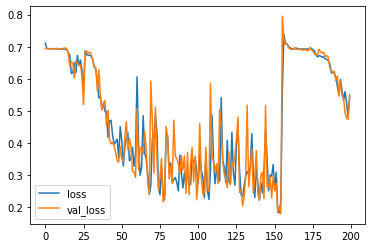

In [12]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

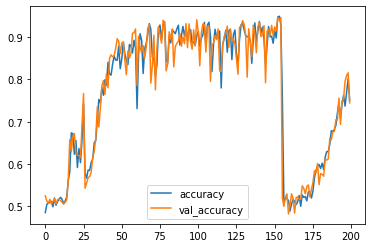

In [13]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [14]:
# LSTM
input=np.expand_dims(X,-1)
i=Input(shape=(T,D))

x=LSTM(5)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
r=model.fit(
    input,Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 5s 13ms/step - loss: 0.6958 - accuracy: 0.4920 - val_loss: 0.6939 - val_accuracy: 0.4744
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5052 - val_loss: 0.6942 - val_accuracy: 0.4792
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.5044 - val_loss: 0.6930 - val_accuracy: 0.5168
Epoch 4/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.5092 - val_loss: 0.6950 - val_accuracy: 0.4844
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.5036 - val_loss: 0.6936 - val_accuracy: 0.5056
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.5112 - val_loss: 0.6930 - val_accuracy: 0.5140
Epoch 7/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5060 - val_loss: 0.6944 - val_accuracy: 0.4932
Epoch 8/200


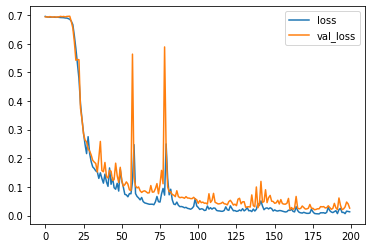

In [15]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

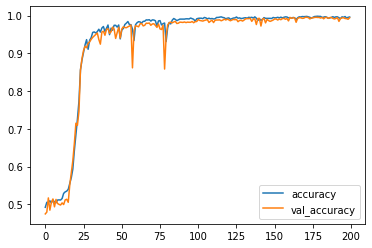

In [16]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [28]:
# T=20
# long distance data
T=20
D=1
X=[]
Y=[]
def get_label(x,i1,i2,i3):
  if x[i1]<0 and x[i2]<0 and x[i3]<0:
    return 1
  if x[i1]<0 and x[i2]>0 and x[i3]>0:
    return 1
  if x[i1]>0 and x[i2]<0 and x[i3]>0:
    return 1
  if x[i1]>0 and x[i2]>0 and x[i3]<0:
    return 1  
  return 0
for t in range(5000):
  x=np.random.randn(T)
  X.append(x)
  #  long dstance
  y=get_label(x,0,1,2)
  Y.append(y)
X=np.array(X)
Y=np.array(Y)
N=len(X)

In [18]:
# simplernn
input=np.expand_dims(X,-1)
i=Input(shape=(T,D))

x=SimpleRNN(5)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
r=model.fit(
    input,Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 21ms/step - loss: 0.7023 - accuracy: 0.5112 - val_loss: 0.6968 - val_accuracy: 0.4984
Epoch 2/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6914 - accuracy: 0.5340 - val_loss: 0.6953 - val_accuracy: 0.5036
Epoch 3/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6916 - accuracy: 0.5200 - val_loss: 0.6972 - val_accuracy: 0.4920
Epoch 4/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6902 - accuracy: 0.5284 - val_loss: 0.6938 - val_accuracy: 0.5196
Epoch 5/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6926 - accuracy: 0.5208 - val_loss: 0.6959 - val_accuracy: 0.4984
Epoch 6/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6900 - accuracy: 0.5304 - val_loss: 0.6974 - val_accuracy: 0.4988
Epoch 7/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6922 - accuracy: 0.5236 - val_loss: 0.6978 - val_accuracy: 0.4928
Epoch 

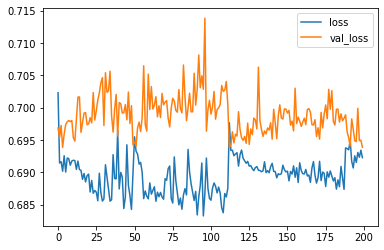

In [19]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

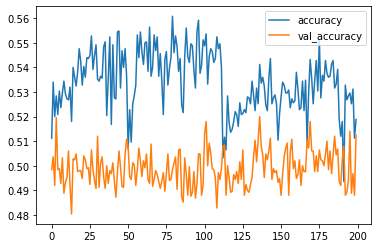

In [20]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [25]:
# LSTM
input=np.expand_dims(X,-1)
i=Input(shape=(T,D))

x=LSTM(5)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
r=model.fit(
    input,Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 12ms/step - loss: 0.6939 - accuracy: 0.4976 - val_loss: 0.6942 - val_accuracy: 0.5132
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6929 - accuracy: 0.5044 - val_loss: 0.6937 - val_accuracy: 0.5228
Epoch 3/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5112 - val_loss: 0.6945 - val_accuracy: 0.5152
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.5144 - val_loss: 0.6932 - val_accuracy: 0.5148
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6929 - accuracy: 0.5108 - val_loss: 0.6940 - val_accuracy: 0.5164
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6922 - accuracy: 0.5232 - val_loss: 0.6932 - val_accuracy: 0.4952
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6921 - accuracy: 0.5124 - val_loss: 0.6939 - val_accuracy: 0.5124
Epoch 8/200


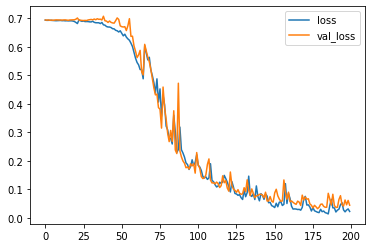

In [26]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

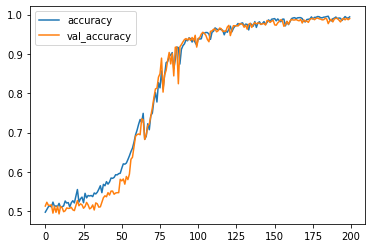

In [27]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [29]:
# GRU

input=np.expand_dims(X,-1)
i=Input(shape=(T,D))

x=GRU(5)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
r=model.fit(
    input,Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 16ms/step - loss: 0.7000 - accuracy: 0.5100 - val_loss: 0.6921 - val_accuracy: 0.5284
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6959 - accuracy: 0.4748 - val_loss: 0.6969 - val_accuracy: 0.4800
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6945 - accuracy: 0.4976 - val_loss: 0.6951 - val_accuracy: 0.4756
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6938 - accuracy: 0.5048 - val_loss: 0.6980 - val_accuracy: 0.4768
Epoch 5/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6959 - accuracy: 0.4952 - val_loss: 0.6951 - val_accuracy: 0.4972
Epoch 6/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.5084 - val_loss: 0.6915 - val_accuracy: 0.5260
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6946 - accuracy: 0.4900 - val_loss: 0.6915 - val_accuracy: 0.5220
Epoch 8/200


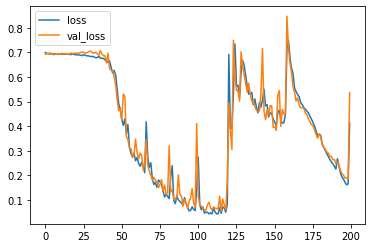

In [30]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

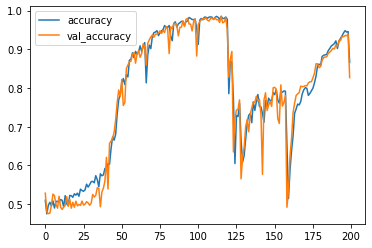

In [31]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [35]:
# T=30
# long distance data
T=30
D=1
X=[]
Y=[]
def get_label(x,i1,i2,i3):
  if x[i1]<0 and x[i2]<0 and x[i3]<0:
    return 1
  if x[i1]<0 and x[i2]>0 and x[i3]>0:
    return 1
  if x[i1]>0 and x[i2]<0 and x[i3]>0:
    return 1
  if x[i1]>0 and x[i2]>0 and x[i3]<0:
    return 1  
  return 0
for t in range(5000):
  x=np.random.randn(T)
  X.append(x)
  #  long dstance
  y=get_label(x,0,1,2)
  Y.append(y)
X=np.array(X)
Y=np.array(Y)
N=len(X)

In [36]:
# LSTM+GlobalMaxPool1D
input=np.expand_dims(X,-1)
i=Input(shape=(T,D))

x=LSTM(5, return_sequences=True)(i)
x=GlobalMaxPool1D()(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
r=model.fit(
    input,Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 12ms/step - loss: 0.6944 - accuracy: 0.5024 - val_loss: 0.6930 - val_accuracy: 0.5152
Epoch 2/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6931 - accuracy: 0.5112 - val_loss: 0.6929 - val_accuracy: 0.4972
Epoch 3/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6924 - val_accuracy: 0.5140
Epoch 4/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6927 - accuracy: 0.5236 - val_loss: 0.6920 - val_accuracy: 0.5152
Epoch 5/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6912 - accuracy: 0.5144 - val_loss: 0.6900 - val_accuracy: 0.5180
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6885 - accuracy: 0.5460 - val_loss: 0.6871 - val_accuracy: 0.5428
Epoch 7/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6798 - accuracy: 0.5760 - val_loss: 0.6780 - val_accuracy: 0.5740
Epoch 8/200


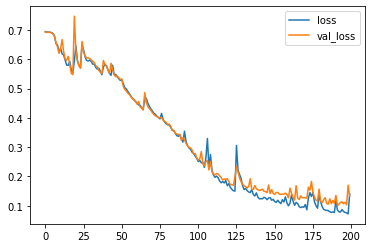

In [37]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

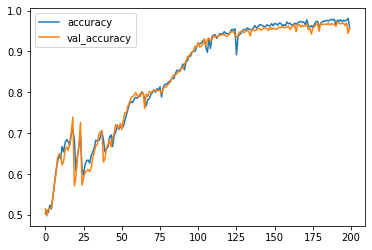

In [38]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()